# ctDNA changes as a predictive marker for response (PR/CR/SD/PD) (UMCG/Paul and Hylke, validation at MUG)

In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

from pipelines import pipeline_Freeman, get_classifier_init_params
from transform import combine_tsv_files, generate_data_pairs, generate_model_data_pairs
from views import compare_prognostic_value_genomic_information, view_linear_model_freeman

# Model: Logistic regression with $L_2$ regularisation

In [2]:
random_state=1234

Estimator = LogisticRegression
kwargs = get_classifier_init_params(Estimator, random_state=random_state)
classifier = Estimator(**kwargs)

## In how many patients did we observe consistent increase/decrease of ctDNA levels? How many patients showed a mixed molecular response?
Figure of Paul

## Can changing levels predict response?
Marginally:

In [3]:
# Difference genomic variable.
X_train_t0, y_train = combine_tsv_files(
    "output/train__gene__t0__No. Mutant Molecules per mL.tsv",
    "output/train__gene__t0__CNV Score.tsv",
)

In [4]:
y_train = y_train["response_grouped"]

response_labels = ['non responder (sd+pd)', 'responder (pr+cr)', 'non evaluable (ne)']
pos_label = 'responder (pr+cr)'
y_train = y_train == pos_label

In [5]:
# logistic_Freeman = pipeline_Freeman(estimator=classifier)
# logistic_Freeman

In [6]:
# figure_filenames = ("logistic_regression__clinical_freeman__t0", "logistic_regression__genetic_freeman__t0")
# view_linear_model_freeman(
#     X_train_t0, 
#     y_train, 
#     logistic_Freeman, 
#     filenames=figure_filenames, 
# )

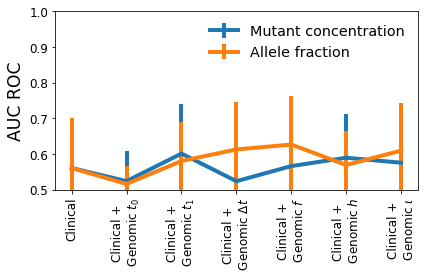

In [7]:
mutant_data_pairs = generate_data_pairs(
    filename_prefix="output/all__gene", snv_type="No. Mutant Molecules per mL"
)
vaf_data_pairs = generate_data_pairs(
    filename_prefix="output/all__gene", snv_type="Allele Fraction"
)
model_mutant_data_pairs = generate_model_data_pairs(mutant_data_pairs, model=classifier)
model_vaf_data_pairs = generate_model_data_pairs(vaf_data_pairs, model=classifier)
compare_prognostic_value_genomic_information(model_mutant_data_pairs, plot_label="Mutant concentration")
compare_prognostic_value_genomic_information(model_vaf_data_pairs, plot_label='Allele fraction')
plt.savefig('figs/comparison_genomic_data.png', bbox_inches="tight")

## Do baseline levels correlate with response
See figure:
![VAF/mol](figs/comparison_genomic_data.png "VAF molecules comparison")

## Define a cut-off for quantitative change or for baseline levels!
## Use mean of all variants
## Use a delta (T0-T1) of 30% as cut-off
## Use a delta (T0-T1) of 50% as cut-off
## Use a delta (T0-T1) of 80% as cut-off
## Consider only variants with VAF <0.5%
## Consider only variants with VAF <1%
## Use “highest” only
## Use cases with consistent vs mixed changes in levels
## Use all variants including synonymous
## Use only variants excluding synonymous

## Check whether VAF OR mutant molecules/ml is a better predictor
See figure:
![VAF/mol](figs/comparison_genomic_data.png "VAF molecules comparison")